# Standarisasi Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Memuat data training
train_data = pd.read_csv('data_training.csv')

# Pisahkan fitur (X) dan target (y) pada data training
X_train = train_data.drop(columns=['Outcome'])  # Semua fitur numerik
y_train = train_data['Outcome']  # Target (kolom kategorikal 'Outcome')

# Tampilkan data sebelum standarisasi
print("=== Data Training Sebelum Standarisasi ===")
print(X_train.head())  # Menampilkan 5 baris pertama dari fitur numerik

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi fitur numerik (hanya X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Mengubah hasil standarisasi menjadi DataFrame dengan kolom yang sama
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Tampilkan data setelah standarisasi
print("\n=== Data Training Setelah Standarisasi ===")
print(X_train_scaled_df.head())  # Menampilkan 5 baris pertama dari fitur yang sudah distandarisasi

=== Data Training Sebelum Standarisasi ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       84              0              0        0   0.0   
1            9      112             82             24        0  28.2   
2            1      139             46             19       83  28.7   
3            0      161             50              0        0  21.9   
4            6      134             80             37      370  46.2   

   DiabetesPedigreeFunction  Age  
0                     0.304   21  
1                     1.282   50  
2                     0.654   22  
3                     0.254   65  
4                     0.238   46  

=== Data Training Setelah Standarisasi ===
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
1     1.588046 -0.276643       0.680345       0.233505 -0.701206 -0.489169   
2    -0.828460  0.566871      -1.265

# Visualisasi Distribusi Kelas Target (Outcome) di Data Training

Jumlah data untuk setiap kelas target (Outcome):
Outcome
0    401
1    213
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11160\3968528206.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=train_data, palette='Set2')


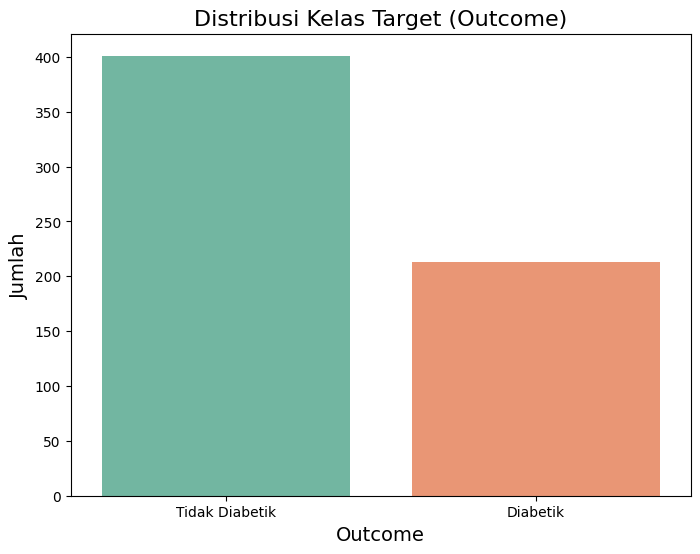

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah data untuk setiap kelas target 'Outcome'
outcome_counts = train_data['Outcome'].value_counts()

# Menampilkan jumlah data untuk masing-masing kelas
print(f"Jumlah data untuk setiap kelas target (Outcome):")
print(outcome_counts)

# Visualisasi distribusi kelas target 'Outcome'
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=train_data, palette='Set2')
plt.title('Distribusi Kelas Target (Outcome)', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks([0, 1], ['Tidak Diabetik', 'Diabetik'])  # Menambahkan label untuk 0 dan 1
plt.show()

# Handling Imbalance Data Menggunakan SMOTE

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Memisahkan fitur (X) dan target (y) pada data training
X_train = train_data.drop(columns=['Outcome'])  # Semua fitur numerik
y_train = train_data['Outcome']  # Target (kolom kategorikal 'Outcome')

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE untuk menyeimbangkan kelas
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Konversi X_train_resampled ke DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Menampilkan jumlah data setelah SMOTE
print("\nJumlah data setelah SMOTE:")
print(y_train_resampled.value_counts())  # Jumlah data setelah SMOTE

# Optional: Gabungkan kembali fitur dan target yang sudah di-resample
train_data_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Menampilkan beberapa baris pertama dari data yang sudah di-resample
print("\nBeberapa baris pertama data yang sudah di-resample:")
print(train_data_resampled.head())


Jumlah data setelah SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64

Beberapa baris pertama data yang sudah di-resample:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
1     1.588046 -0.276643       0.680345       0.233505 -0.701206 -0.489169   
2    -0.828460  0.566871      -1.265862      -0.090720  0.013448 -0.424522   
3    -1.130523  1.254179      -1.049617      -1.322774 -0.701206 -1.303720   
4     0.681856  0.410665       0.572222       1.076490  2.484601  1.838121   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.490735 -1.035940        0  
1                  2.415030  1.487101        1  
2                  0.549161 -0.948939        0  
3                 -0.639291  2.792122        0  
4                 -0.686829  1.139095        1  


# Visualisasi Distribusi Kelas Target Sebelum dan Setelah SMOTE

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11160\3437898570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='Set2')


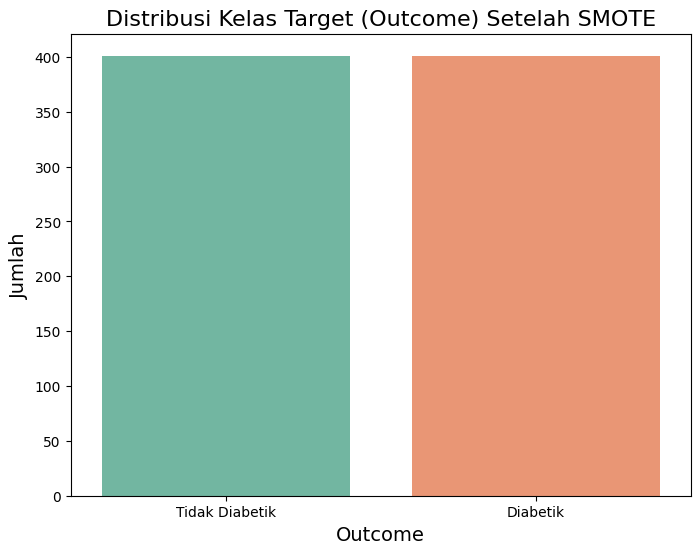

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas target setelah SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title('Distribusi Kelas Target (Outcome) Setelah SMOTE', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks([0, 1], ['Tidak Diabetik', 'Diabetik'])  # Menambahkan label untuk 0 dan 1
plt.show()

# Menampilkan Data Hasil Handling Imbalance Menggunakan SMOTE

In [5]:
import pandas as pd

# Menggabungkan kembali fitur yang sudah di-resample dengan target yang sudah di-resample
train_data_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Tampilkan beberapa baris pertama dari data hasil SMOTE
print("=== Data Hasil Handling Imbalance Menggunakan SMOTE ===")
print(train_data_resampled.head())

# Tampilkan jumlah data setelah SMOTE
print("\nJumlah data setelah SMOTE:")
print(y_train_resampled.value_counts())  # Menampilkan distribusi kelas setelah SMOTE

=== Data Hasil Handling Imbalance Menggunakan SMOTE ===
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
1     1.588046 -0.276643       0.680345       0.233505 -0.701206 -0.489169   
2    -0.828460  0.566871      -1.265862      -0.090720  0.013448 -0.424522   
3    -1.130523  1.254179      -1.049617      -1.322774 -0.701206 -1.303720   
4     0.681856  0.410665       0.572222       1.076490  2.484601  1.838121   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.490735 -1.035940        0  
1                  2.415030  1.487101        1  
2                  0.549161 -0.948939        0  
3                 -0.639291  2.792122        0  
4                 -0.686829  1.139095        1  

Jumlah data setelah SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64


# Visualisasi Correlation Matrix

In [6]:
import pandas as pd

# Gabungkan fitur yang sudah di-resample (X_train_resampled) dengan target (y_train_resampled)
smote_data = pd.DataFrame(X_train_resampled, columns=X_train.columns)  # Fitur setelah SMOTE
smote_data['Outcome'] = y_train_resampled  # Menambahkan kolom target 'Outcome' yang sudah di-resample


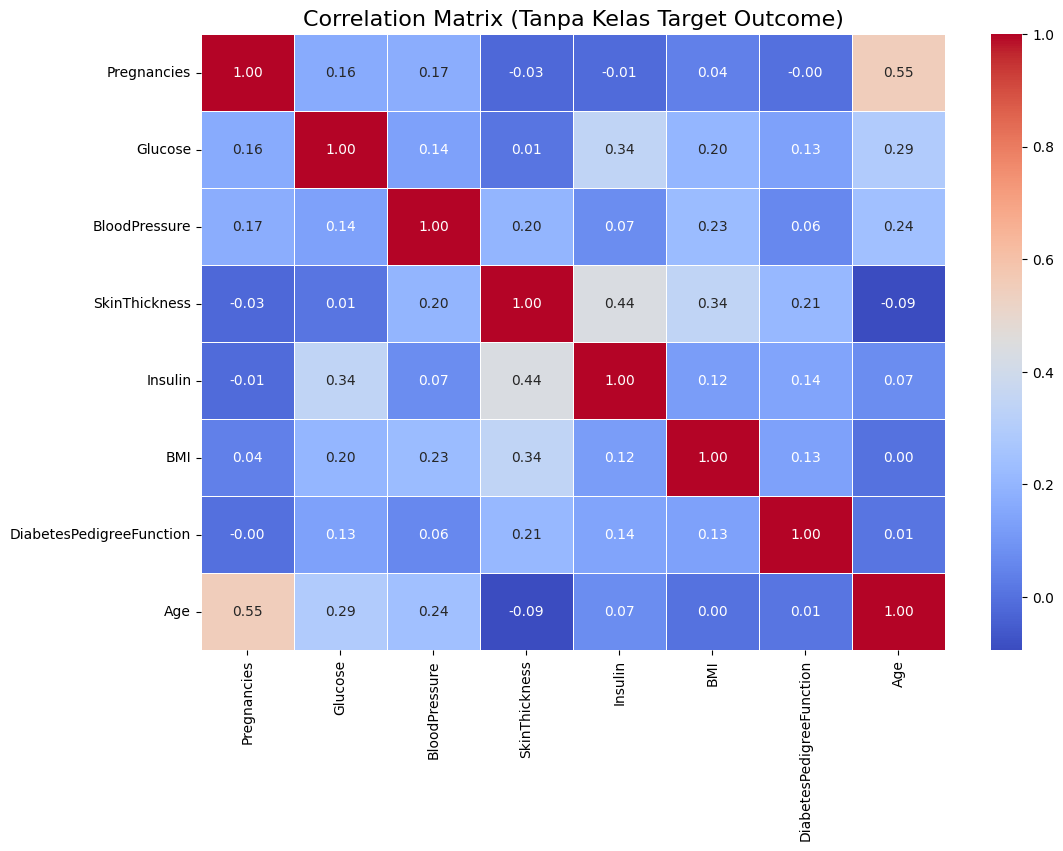

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus kolom 'Outcome' untuk analisis korelasi
X_train_no_outcome = smote_data.drop(columns=['Outcome'])

# Menghitung korelasi antar fitur
correlation_matrix = X_train_no_outcome.corr()

# Visualisasi korelasi dengan Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix (Tanpa Kelas Target Outcome)', fontsize=16)
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Mengimpor data testing
test_data = pd.read_csv('data_testing.csv')

# Pisahkan fitur (X) dan target (y) pada data testing
X_test = test_data.drop(columns=['Outcome'])  # Semua fitur kecuali Outcome
y_test = test_data['Outcome']  # Target (kolom kategorikal 'Outcome')

# Lakukan standarisasi pada data testing (menggunakan standar yang sama dengan data training)
scaler = StandardScaler()

# Terapkan standarisasi pada data testing
X_test_scaled = scaler.fit_transform(X_test)

# Konversi X_train_resampled ke DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Menampilkan beberapa baris pertama dari data testing setelah standarisasi
print("\nData Testing Setelah Standarisasi:")
print(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())




Data Testing Setelah Standarisasi:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.491242 -0.726678      -0.441476       0.667308  1.051919  0.233748   
1    -0.633683 -0.285349       0.318908       0.611305 -0.660221  0.435379   
2    -0.633683 -0.411443      -0.173105      -1.180790 -0.660221 -0.145794   
3     1.053704 -0.442966       0.542551      -1.180790 -0.660221 -0.881156   
4     0.772473  0.471215       0.989836      -1.180790 -0.660221 -0.252540   

   DiabetesPedigreeFunction       Age  
0                 -0.170941  0.666612  
1                 -1.086080 -1.073358  
2                 -1.053629 -1.073358  
3                  1.211504 -0.045194  
4                 -0.884879  1.220238  


In [9]:

print("Ukuran X_train:", X_train_resampled.shape)  # Fitur pelatihan
print("Ukuran y_train:", y_train_resampled.shape)  # Target pelatihan

Ukuran X_train: (802, 8)
Ukuran y_train: (802,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membangun model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mencoba nilai k yang berbeda

# Melatih model dengan data training yang sudah distandarisasi sebelumnya (dari hasil SMOTE)
knn_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data testing (yang sudah distandarisasi)
y_pred = knn_model.predict(X_test_scaled)

# Evaluasi model
print("\nEvaluasi Model KNN pada Data Testing:")
print(f"Akurasinya: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluasi Model KNN pada Data Testing:
Akurasinya: 0.6883

Confusion Matrix:
[[69 30]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        99
           1       0.55      0.67      0.61        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.69      0.69       154

